In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import read_info_files, read_keyword_files, read_keyword_lists
from figures import pie_plot, pie_timeline

In [2]:
df_info = read_info_files()
df_keys = read_keyword_files()

In [3]:
OPTIMISATION = ["reinforcement learning", "evolutionary learning", "bayesian optimisation","differentiable optimisation"]

# Fixed keywords

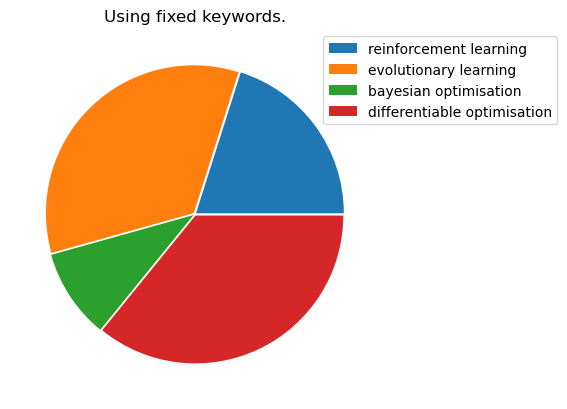

In [4]:
pie_plot(df_keys, OPTIMISATION, "Using fixed keywords.", "optimisation_pie_fixed_keywords.png")


In [5]:
timeline = (
    df_keys[OPTIMISATION]
    .merge(df_info[["year","id"]], on="id")
    .drop(columns=["id"])
    .groupby("year")
    .sum()
    .query('year >= 2017 & year < 2025')
)
timeline 

,reinforcement learning,evolutionary learning,bayesian optimisation,differentiable optimisation
year,,,,
2017,5,3,1,0
2018,11,14,3,8
2019,27,29,10,39
2020,24,38,16,63
2021,24,42,7,57
2022,11,26,11,20
2023,10,26,4,22
2024,13,33,4,31


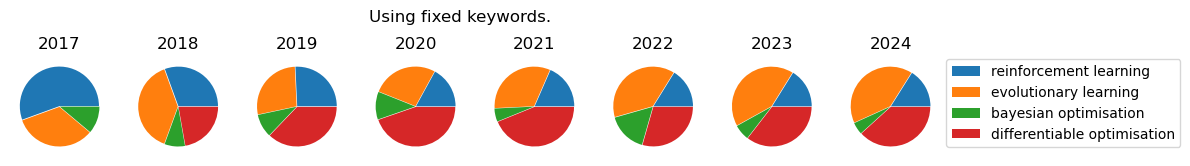

In [12]:
pie_timeline(timeline, OPTIMISATION, "Using fixed keywords.", "optimisation_pie_timeline_fixed_keywords.png")

# LLM Keywords

In [14]:
OPTIMISATION

['reinforcement learning',
 'evolutionary learning',
 'bayesian optimisation',
 'differentiable optimisation']

In [15]:
OPTIMISATION_KEYS=["reinforcement", "evolutionary", "bayesian", "differentiable"]

In [16]:
df_years = df_info[["id", "year"]].set_index("id")
dict_keys = {
    key: " ".join(keys)
    for key, keys in read_keyword_lists().items()
}

In [17]:
for name, key in zip(OPTIMISATION, OPTIMISATION_KEYS):
    ids = [
        id for id in dict_keys.keys()
        if key in dict_keys[id]
    ]
    df_years[name] = False
    df_years.loc[df_years.index.isin(ids), name] = True

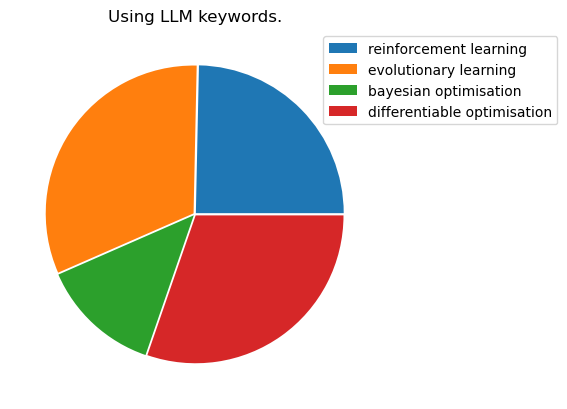

In [18]:
pie_plot(df_years, OPTIMISATION, "Using LLM keywords.", "optimisation_pie_LLM_keywords.png")


In [19]:
timeline2 = (
    df_years[OPTIMISATION + ["year"]]
    .groupby("year")
    .sum()
    .query('year >= 2017 & year < 2025')
)
timeline2

,reinforcement learning,evolutionary learning,bayesian optimisation,differentiable optimisation
year,,,,
2017,5,2,1,0
2018,8,11,3,2
2019,17,11,10,18
2020,18,22,12,25
2021,15,20,5,32
2022,9,17,9,8
2023,7,14,4,13
2024,7,15,4,14


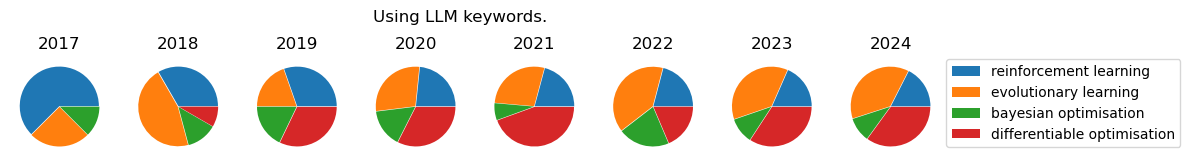

In [20]:
pie_timeline(timeline2, OPTIMISATION, "Using LLM keywords.", "optimisation_pie_timeline_LLM_keywords.png")